# Домошняя работа № 6

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)

In [8]:
# посмотрим, что это такое
type(housing)

sklearn.utils._bunch.Bunch

In [9]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [10]:
print(housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


In [11]:
print(housing.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [12]:
# преобразую data в уже привычный мне df
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
# Целевая переменная – MedHouseVal
target = pd.DataFrame(housing.target, columns=housing.target_names)
target.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [14]:
df = pd.DataFrame(housing.frame)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [16]:
# проверим на пропуски
filtered_df = df[df.isna().any(axis=1)]
filtered_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


будем считать, что этот тип данных я тоже освоил)

In [17]:
data_processed = df

In [18]:
data_processed.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


Поля данных в наборе California housing dataset, загружаемом с помощью функции fetch_california_housing(), означают следующее:
1. MedInc — средний доход в группе блоков;
2. HouseAge — средний возраст дома в группе блоков;
3. AveRooms — среднее количество комнат на домохозяйство;
4. AveBedrms — среднее количество спален на домохозяйство;
5. Population — население группы блоков;
6. AveOccup — среднее количество членов домохозяйства;
7. Latitude — широта группы блоков;
8. Longitude — долгота группы блоков.

MedHouseVal - Целевая переменная — средняя стоимость дома в округах Калифорнии, выраженная в сотнях тысяч долларов

Будем использовать линейную регрессию для тестирования качества данных

In [102]:
from sklearn.preprocessing import StandardScaler

def get_score(X,y, random_seed=42, model=None):
  if model is None:
      model = LinearRegression()

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [20]:
# сохраним
columns = [
    'MedInc',
    'HouseAge',
    'AveRooms',
    'AveBedrms',
    'Population',
    'AveOccup',
    'Latitude',
    'Longitude'
]

In [21]:
# с этой колонкой будем работать
tmp_columns = columns
tmp_columns

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

посмотрим, что мы получим на не обработанных данных

In [22]:
get_score(data_processed[columns], data_processed['MedHouseVal'])

0.575787706032451

чуть лучше, чем просто монетку подбрасывать

# 1 MedInc — средний доход в группе блоков

In [23]:
data_processed.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])

def get_pairplot(X, columns=None):
    if columns is None:
        columns = list(X.columns)
    sns.pairplot(X[columns])

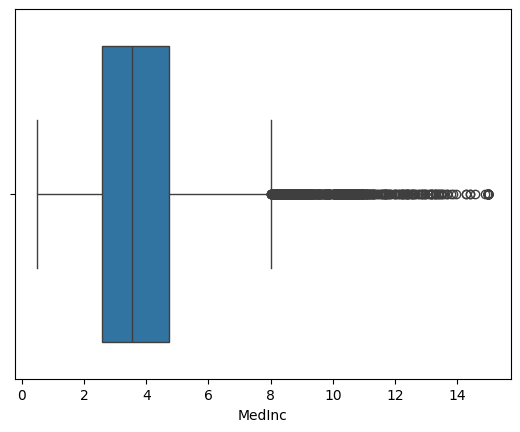

In [25]:
get_boxplot(data_processed, columns=['MedInc'])

проверим значения больше 8

In [26]:
data_processed[data_processed['MedInc'] > 8].head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
131,11.6017,18.0,8.335052,1.082474,533.0,2.747423,37.84,-122.19,3.926
134,8.2049,28.0,6.978947,0.968421,463.0,2.436842,37.83,-122.19,3.352
135,8.4010,26.0,7.530806,1.056872,542.0,2.568720,37.83,-122.20,3.512


Ни каких видимых отклонений я не обноружил.
Единственное объяснение - зависимость от района проживания.
Придется в первую очерель обратиться к геоданным.

# Первоначальная работа с геоданными

По данным Википедии Калифорния разделена на 58 округов.

In [27]:
from sklearn.cluster import DBSCAN, KMeans

In [28]:
# разделим наши геоданные на 58 кластеров
# решение не идеальное, но вполне объяснимое -
# наши данные должны группироваться по географическому признаку
# сопостовимому с административным устройством
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=58)
cluster = kmeans.fit_predict(data_processed[['Latitude', 'Longitude']])
cluster

array([10, 10, 10, ..., 49, 49, 49], dtype=int32)

In [60]:
# посмотрим на уникальнын значения в наших кластерах
unique, frequency = np.unique(cluster,
                              return_counts = True)
print("Unique Values:", unique)
print("Frequency Values:", frequency)

Unique Values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57]
Frequency Values: [ 329 1311  334  902 1174  291  171  128  217  618  771  152   33  128
  446  814 1312  167  230  423   44  410  112  479  540   37   47   22
  157  423  131   29  217  323 1754   84  418   45  103   34  128   30
  123 1525  410  852  409  103  207  245  137   53   22  702  112   37
   42  143]


In [110]:
tmp = data_processed.copy()
tmp['cluster'] = cluster
tmp

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,10
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,10
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,10
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,10
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,10
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,6
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,49
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,49
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,49


In [109]:
tmp.columns.values

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal', 'cluster'],
      dtype=object)

In [119]:
tmp_columns = list(tmp.columns.values[~np.isin(tmp.columns.values, 'MedHouseVal')])
get_score(tmp[tmp_columns], tmp['MedHouseVal'])

0.5846985104044654

In [38]:
data_processed.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [78]:
tmp['frequency'] = np.nan

for i, value in enumerate(frequency):
  tmp['frequency'] = tmp['frequency'].mask(tmp['cluster'] == i, value)

tmp

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,frequency
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,10,771.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,10,771.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,10,771.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,10,771.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,10,771.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,6,171.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,49,245.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,49,245.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,49,245.0


In [81]:
get_score(tmp[list(tmp.columns.values)], tmp['MedHouseVal'])

1.0

In [86]:
tmp = tmp.drop(columns=['cluster'])
tmp

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,frequency
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,771.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,771.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,771.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,771.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,771.0
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,171.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,245.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,245.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,245.0


In [89]:
list(tmp.columns.values)

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal',
 'frequency']

In [ ]:
my_list = ['apple', 'banana', 'orange', 'pear']
my_list.remove('banana')

In [ ]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)
model.score(X_test, y_test)

In [103]:
get_score(tmp[list(tmp.columns.values)], tmp['MedHouseVal'])

1.0

In [106]:
list(tmp.columns.values)

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal',
 'cluster']

In [92]:
y = tmp['MedHouseVal']
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [93]:
X = tmp.drop(columns=['MedHouseVal'])
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,cluster
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,10
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,10
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,10
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,10
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,10


In [98]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5846985104044654